In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
def processName(config):
    results_name = f"embed_dim{config['embed_dim']}"
    results_name += "_active" if config["active"] else "_passive"
    results_name += "_saving_task_num" if config["saving_task_num"] else "_not_saving_task_num"
    if config["active"]:
        results_name += "_target_aware" if config["target_aware"] else "_target_agnostic"
    results_name += f"_target_sample_num{config['num_target_sample']}"
    results_name += f"_seed{config['data_seed']}"
    results_name += f"_actual_target{config['actual_target']}" if "actual_target" in config else "default"
    return results_name

### Summary

Setting:
- Use an 13-d nonlinear feature $Cx, Cy, g, \alpha_1, \alpha_2, CxCy, Cx^2, Cx^2C_y, C_x^3, Cy^2, Cy^2C_x, C_y^3, 0 or 1 $ and an bias dummy feature $1$
- Try 5 different target each with 10 random seeds. For each target, I plot the test loss and the most-related-source similarity for tach target.
    - For most-related_source similarity, I use 
    $\frac{\psi(w_\text{target})^T \psi(w_\text{est})}{\|\psi(w_\text{target})\| \| \psi(w_\text{est})\|}$
- Base sampling algorithm: Uniformly draw from 5-d cube and lift to 13-d. The condition number of $\sum_{w} \psi(w)\psi(w)^T \approx 150 $
- AL target-aware algorithm: Uniformly draw (same as base) for $\mathcal{O}(n^{3/4})$ and draw from estimated most relevant direction fro $\mathcal{O}(n)$

Results:
- The test loss of passive does not always converge as expected, it usually converge first and then violate. Probably due to training? Overall a joint training is not that easy.
- The test loss of AL will always steadily converge and performs overall better than the passive.
- Is it capture the linear behavior? I will say *partially* ...
    - When $w[0],w[1]$($C_x,C_y$) for the target is close to zero, we observe the a relatively high similarity. (This may indicates it capture the linear model.)
    - Otherwise, the similarity is low. (Seems although we make model linear to $w$, it will still be affected by the nonlinearity of $x$ ? )
    - The overall similarity estimation is not that stable.

<Axes: xlabel='budget', ylabel='loss'>

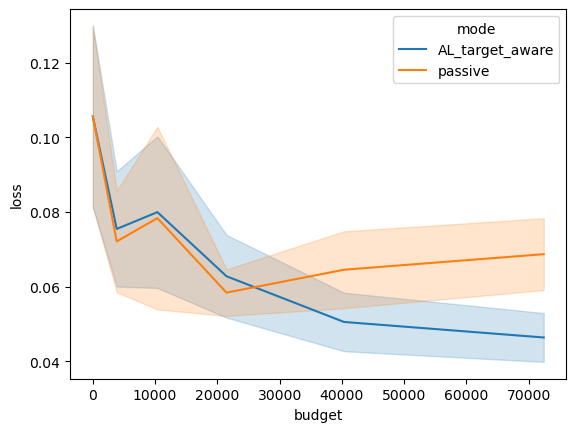

In [4]:
config = {
        "embed_dim": 8,
        "input_dim": 60,
        "num_target_sample": 4000,
        "active": None,
        "target_aware": None,
        "saving_task_num": True,
        "base_len_ratio": 1,
        "exp_base": 2,
        "outer_epoch_num": 4,
        "actual_target":  [0, 0, 1, 0.5, 0, 0]
        }


result = None
for seed in [ 43, 500, 12434, 425, 987, 26794, 56, 89, 1111, 89731, 21312]:
# for seed in [ 43, 500, 425, 987, 56, 89, 1111, 89731, 21312]:
    for active in [True, False]:
            config["data_seed"] = seed
            config["active"] = active
            config["target_aware"] = True if active else False
            filename = processName(config)
            tmp = pd.read_csv(f"results/pendulum_nonlinear_highErrorBar/{filename}.csv")
            if active:
                tmp["mode"] = "AL_target_aware" 
            else:
                tmp["mode"] = "passive"
            tmp['seed'] = seed
            if result is None:
                result = tmp
            else:
                result = pd.concat([result, tmp])
                
sns.lineplot(x="budget", y="loss", data=result, hue="mode", errorbar=('se',1), markers=True, dashes=False)
# plt.ylim([0.01, 0.07])
# plt.xlim([5000, 60000])
# plt.xscale("log")
# plt.yscale("log")

<Axes: xlabel='budget', ylabel='related_source_est_similarities'>

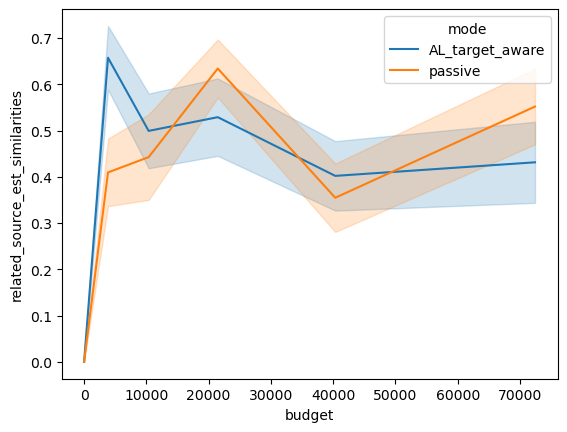

In [5]:
result["related_source_est_similarities"] = result["related_source_est_similarities"].abs()
sns.lineplot(x="budget", y="related_source_est_similarities", data=result, errorbar=('se',1),hue="mode", markers=True, dashes=False)

(5000.0, 60000.0)

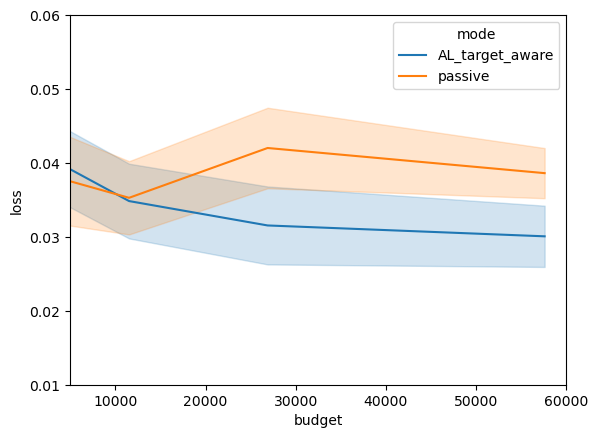

In [187]:
config = {
        "embed_dim": 8,
        "input_dim": 60,
        "num_target_sample": 4000,
        "active": None,
        "target_aware": None,
        "saving_task_num": True,
        "base_len_ratio": 1,
        "exp_base": 2,
        "outer_epoch_num": 4,
        "actual_target": [0, 0, 0.5, 0, 0.5, 0]
        }


result = None
for seed in [ 43, 500, 12434, 425, 987, 26794, 56, 89, 1111, 89731, 21312]:
# for seed in [ 43, 500, 425, 987, 56, 89, 1111, 89731, 21312]:
    for active in [True, False]:
            config["data_seed"] = seed
            config["active"] = active
            config["target_aware"] = True if active else False
            filename = processName(config)
            tmp = pd.read_csv(f"results/pendulum_nonlinear_highErrorBar/{filename}.csv")
            if active:
                tmp["mode"] = "AL_target_aware" 
            else:
                tmp["mode"] = "passive"
            tmp['seed'] = seed
            if result is None:
                result = tmp
            else:
                result = pd.concat([result, tmp])
                
sns.lineplot(x="budget", y="loss", data=result, hue="mode", errorbar=('se',1), markers=True, dashes=False)
plt.ylim([0.01, 0.06])
plt.xlim([5000, 60000])
# plt.xscale("log")
# plt.yscale("log")

<AxesSubplot: xlabel='budget', ylabel='related_source_est_similarities'>

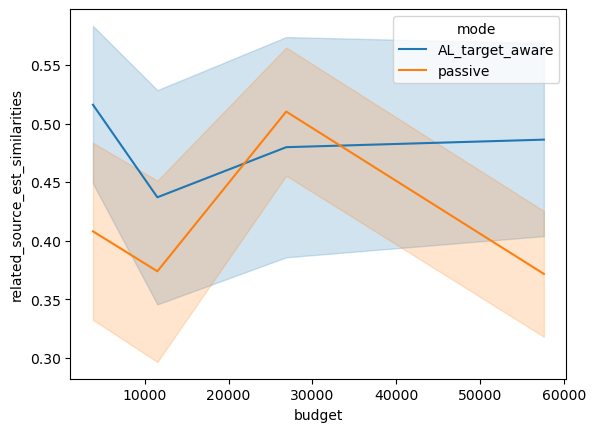

In [188]:
result["related_source_est_similarities"] = result["related_source_est_similarities"].abs()
sns.lineplot(x="budget", y="related_source_est_similarities", data=result, hue="mode", errorbar=('se',1), markers=True, dashes=False)

In [6]:
config = {
        "embed_dim": 8,
        "input_dim": 60,
        "num_target_sample": 4000,
        "active": None,
        "target_aware": None,
        "saving_task_num": True,
        "base_len_ratio": 1,
        "exp_base": 2,
        "outer_epoch_num": 4,
        "actual_target":  [0, -1, 0.5, 0, 0.5, 0]
        }

result = None
for seed in [ 43, 500, 12434, 425, 987, 26794, 56, 89, 1111, 89731, 21312]:
# for seed in [ 43, 500, 425, 987, 56, 89, 1111, 89731, 21312]:
    for active in [True, False]:
            config["data_seed"] = seed
            config["active"] = active
            config["target_aware"] = True if active else False
            filename = processName(config)
            tmp = pd.read_csv(f"results/pendulum_nonlinear_highErrorBar/{filename}.csv")
            if active:
                tmp["mode"] = "AL_target_aware" 
            else:
                tmp["mode"] = "passive"
            tmp['seed'] = seed
            if result is None:
                result = tmp
            else:
                result = pd.concat([result, tmp])
                
sns.lineplot(x="budget", y="loss", data=result, hue="mode", errorbar=('se',1), markers=True, dashes=False)
plt.ylim([0.01, 0.06])
plt.xlim([5000, 60000])
# plt.xscale("log")
# plt.yscale("log")

FileNotFoundError: [Errno 2] No such file or directory: 'results/pendulum_nonlinear_highErrorBar/embed_dim8_active_saving_task_num_target_aware_target_sample_num4000_seed43_actual_target[0, -1, 0.5, 0, 0.5, 0].csv'

<AxesSubplot: xlabel='budget', ylabel='related_source_est_similarities'>

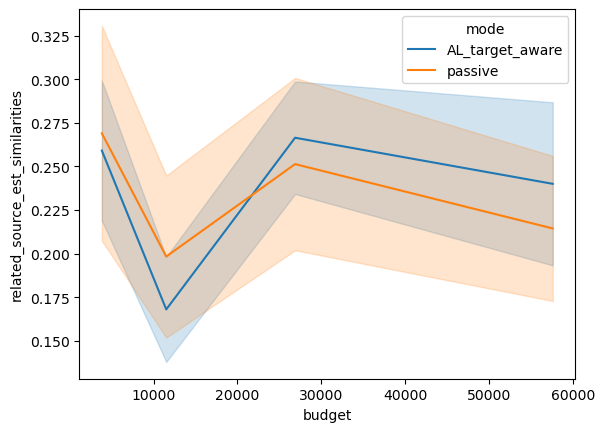

In [190]:
result["related_source_est_similarities"] = result["related_source_est_similarities"].abs()
sns.lineplot(x="budget", y="related_source_est_similarities", data=result, hue="mode",errorbar=('se',1), markers=True, dashes=False)

In [8]:
config = {
        "embed_dim": 8,
        "input_dim": 60,
        "num_target_sample": 4000,
        "active": None,
        "target_aware": None,
        "saving_task_num": True,
        "base_len_ratio": 1,
        "exp_base": 2,
        "outer_epoch_num": 4,
        "actual_target":  [1, 0, 0, 0.5, 0, 0]
        }

result = None
for seed in [ 43, 500, 12434, 425, 987, 26794, 56, 89, 1111, 89731, 21312]:
# for seed in [ 43, 500, 425, 987, 56, 89, 1111, 89731, 21312]:
    for active in [True, False]:
            config["data_seed"] = seed
            config["active"] = active
            config["target_aware"] = True if active else False
            filename = processName(config)
            tmp = pd.read_csv(f"results/pendulum_nonlinear_highErrorBar/{filename}.csv")
            if active:
                tmp["mode"] = "AL_target_aware" 
            else:
                tmp["mode"] = "passive"
            tmp['seed'] = seed
            if result is None:
                result = tmp
            else:
                result = pd.concat([result, tmp])
                
sns.lineplot(x="budget", y="loss", data=result, hue="mode", errorbar=('se',1), markers=True, dashes=False)
plt.ylim([0.01, 0.06])
plt.xlim([5000, 60000])
# plt.xscale("log")
# plt.yscale("log")

FileNotFoundError: [Errno 2] No such file or directory: 'results/pendulum_nonlinear_highErrorBar/embed_dim8_passive_saving_task_num_target_sample_num4000_seed43_actual_target[1, 0, 0, 0.5, 0, 0].csv'

<AxesSubplot: xlabel='budget', ylabel='related_source_est_similarities'>

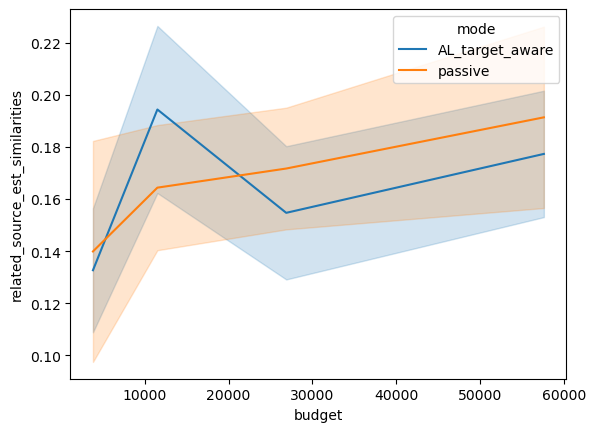

In [176]:
result["related_source_est_similarities"] = result["related_source_est_similarities"].abs()
sns.lineplot(x="budget", y="related_source_est_similarities", data=result, hue="mode", errorbar=('se',1), markers=True, dashes=False)

<AxesSubplot: xlabel='budget', ylabel='loss'>

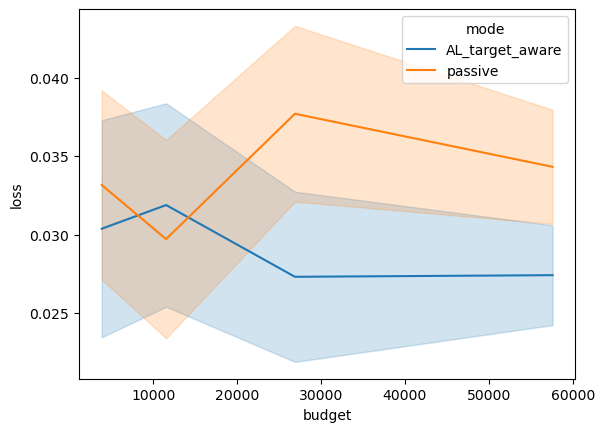

In [177]:
config = {
        "embed_dim": 8,
        "input_dim": 60,
        "num_target_sample": 5000,
        "active": None,
        "target_aware": None,
        "saving_task_num": True,
        "base_len_ratio": 1,
        "exp_base": 2,
        "outer_epoch_num": 4,
        "actual_target": [0, 0.1, 0, -1, 0.5, 0]
        }

result = None
# for seed in [ 500, 12434, 425, 987, 26794, 56, 89, 1111, 89731, 21312]:
for seed in [ 500, 425, 987, 56, 89, 1111, 89731, 21312]:
    for active in [True, False]:
            config["data_seed"] = seed
            config["active"] = active
            config["target_aware"] = True if active else False
            filename = processName(config)
            tmp = pd.read_csv(f"results/pendulum_nonlinear_highErrorBar/{filename}.csv")
            if active:
                tmp["mode"] = "AL_target_aware" 
            else:
                tmp["mode"] = "passive"
            tmp['seed'] = seed
            if result is None:
                result = tmp
            else:
                result = pd.concat([result, tmp])
        
sns.lineplot(x="budget", y="loss", data=result, hue="mode", errorbar=('se',1), markers=True, dashes=False)
# plt.ylim([0, 0.05])
# plt.xlim([8000, 35000])
# plt.xscale("log")
# plt.yscale("log")

<AxesSubplot: xlabel='budget', ylabel='related_source_est_similarities'>

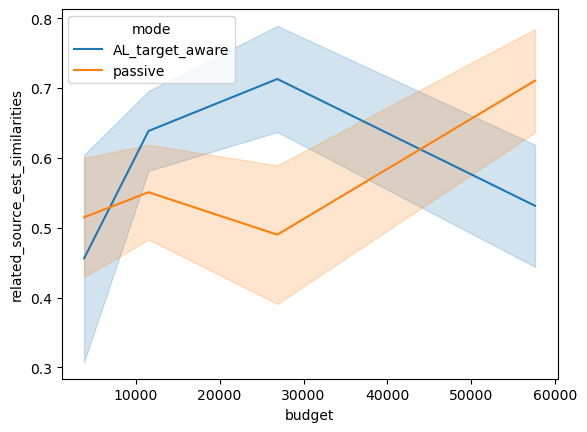

In [178]:
result["related_source_est_similarities"] = result["related_source_est_similarities"].abs()
sns.lineplot(x="budget", y="related_source_est_similarities", data=result, hue="mode", errorbar=('se',1), markers=True, dashes=False)